In [23]:
import pandas as pd;
import numpy as np;
from sklearn.metrics import silhouette_samples as ss
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import itertools 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

In [24]:
# Load dataset (replace with your actual data loading method)
survey_df = pd.read_csv("../../data/final_survey_table.csv", low_memory=False)

In [25]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7799 entries, 0 to 7798
Data columns (total 16 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                             --------------  ----- 
 0   What is your age (# years)?                                                                                                        7799 non-null   object
 1   What is your gender?                                                                                                               7799 non-null   object
 2   In which country do you currently reside?                                                                                          7799 non-null   object
 3   What is the highest level of formal education that you have attained or plan to attain within

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../../data/final_survey_table.csv')  # Replace with your dataset path
df = df.drop_duplicates()  # Remove duplicate rows

In [27]:
# Select and preprocess relevant columns
data = df[['In which country do you currently reside?', 
           'What is your age (# years)?']]
data.columns = ['Country', 'Coding_Experience']  # Rename columns for simplicity
data = data.dropna()  # Drop rows with missing values

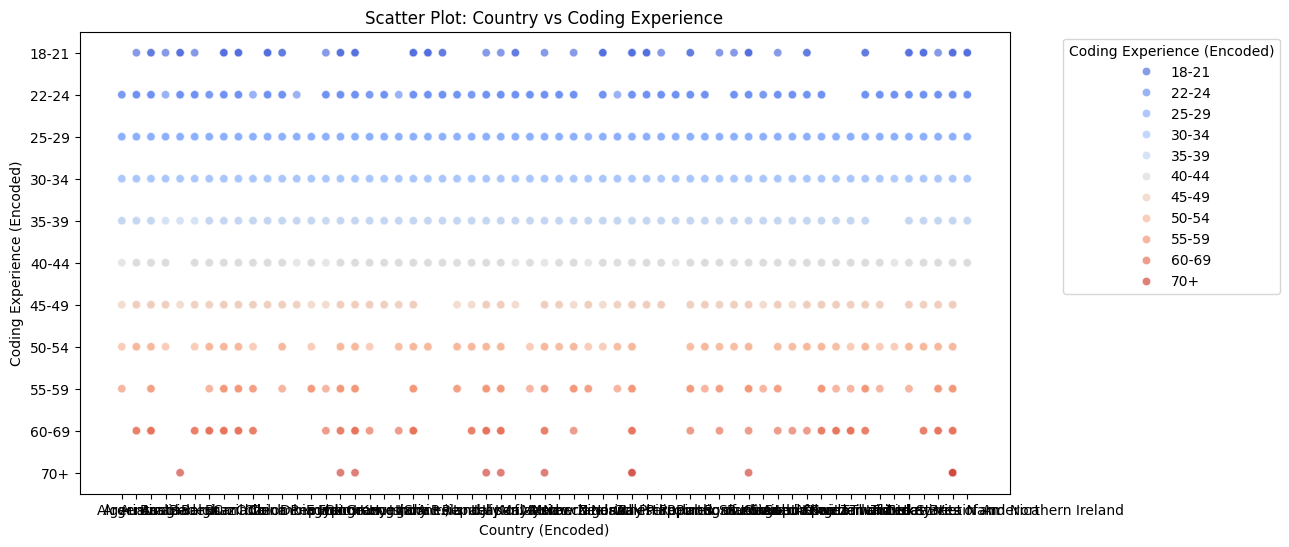

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select and preprocess relevant columns
data = df[['In which country do you currently reside?', 'What is your age (# years)?']]
data.columns = ['Country', 'Coding_Experience']  # Rename columns for simplicity
data = data.dropna()  # Drop rows with missing values

# Convert categorical columns to category type for better plotting
data['Country'] = data['Country'].astype('category')
data['Coding_Experience'] = data['Coding_Experience'].astype('category')

# Bivariate Visualization - Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['Country'], y=data['Coding_Experience'], hue=data['Coding_Experience'], palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot: Country vs Coding Experience')
plt.xlabel('Country (Encoded)')
plt.ylabel('Coding Experience (Encoded)')
plt.legend(title='Coding Experience (Encoded)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [29]:
data

,Country,Coding_Experience
0,Australia,40-44
1,India,22-24
2,India,22-24
3,United States of America,22-24
4,Netherlands,55-59
...,...,...
7794,India,25-29
7795,Other,22-24
7796,China,25-29
7797,Australia,25-29


In [30]:
# Encode categorical variable (Country)
data['Country'] = data['Country'].astype('category').cat.codes
data['Coding_Experience'] = data['Coding_Experience'].astype('category').cat.codes

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

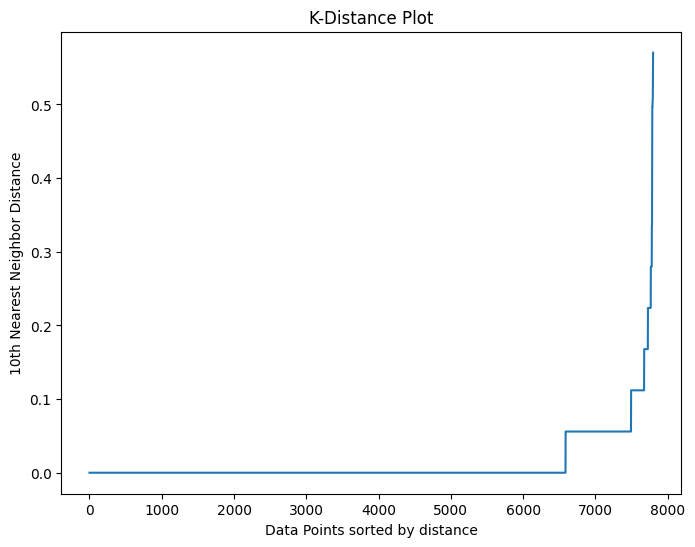

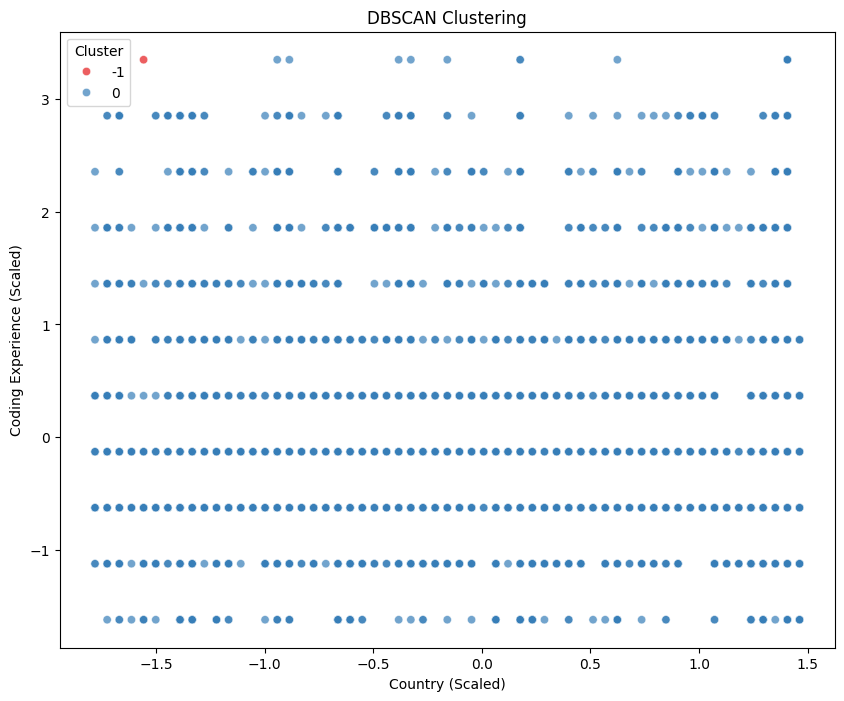

Outliers detected:
      Country  Coding_Experience  Cluster
3905        4                 10       -1


In [31]:
# Determine suitable value for eps using k-distance plot
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

# Sort distances for elbow method
distances = np.sort(distances[:, 9], axis=0)
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('K-Distance Plot')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('10th Nearest Neighbor Distance')
plt.show()

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)  # Adjust eps based on the elbow plot
clusters = dbscan.fit_predict(data_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=data['Cluster'], palette='Set1', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Country (Scaled)')
plt.ylabel('Coding Experience (Scaled)')
plt.legend(title='Cluster')
plt.show()

# Identify outliers (Cluster -1 indicates noise)
outliers = data[data['Cluster'] == -1]
print("Outliers detected:")
print(outliers)


In [32]:
data

,Country,Coding_Experience,Cluster
0,2,5,0
1,20,1,0
2,20,1,0
3,57,1,0
4,31,8,0
...,...,...,...
7794,20,2,0
7795,35,1,0
7796,10,2,0
7797,2,2,0


In [33]:
from sklearn.metrics import silhouette_score as ss

ss(data, data['Cluster'])

0.15179288708422398

In [34]:
epsilons = np.linspace(0.01, 1, num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [35]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [36]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [37]:
N = len(combinations)
N

90

In [38]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    # Compute Hamming distance
    distance_matrix = pairwise_distances(X, metric='hamming')
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples, metric='precomputed').fit(distance_matrix)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, data)

Combination (0.01, 2) on iteration 1 of 90 has 418 clusters. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 289 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 201 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 156 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 126 clusters. Moving on
Combination (0.01, 17) on iteration 6 of 90 has 100 clusters. Moving on
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 418 clusters. Moving on
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 289 clusters. Moving on
Combination (0.08071428571428571, 8) on iteration 9 of 90 has 201 clusters. Moving on
Combination (0.08071428571428571, 11) on iteration 10 of 90 has 156 clusters. Moving on
Combination (0.08071428571428571, 14) on iteration 11 of 90 has 126 clusters. Moving on
Combination (0.08071428571428571, 17) on iteration 12 of 90 has 100 clusters. Moving on
Combination (0.15142857142857144, 2) on iteration

In [39]:
best_dict

{'best_epsilon': 0.01,
 'best_min_samples': 2,
 'best_labels': 'bad',
 'best_score': -10}

In [40]:
df['Cluster'] = best_dict['best_labels']

df['Cluster'].value_counts()

Cluster
bad    7799
Name: count, dtype: int64

In [41]:
df['Cluster'] = best_dict['best_labels']

df['Cluster'].value_counts()

# Encode categorical variable (Country)
data['Country'] = data['Country'].astype('category').cat.codes
data['Coding_Experience'] = data['Coding_Experience'].astype('category').cat.codes

C:\Users\Huawei\AppData\Local\Temp\ipykernel_11236\3309129842.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


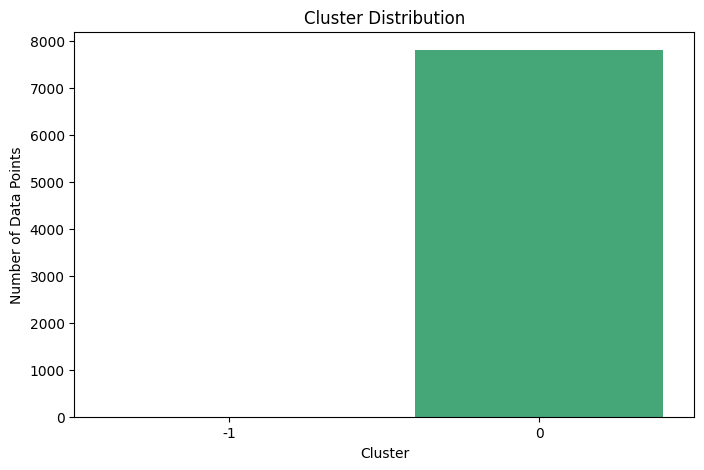

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of data points in each cluster
cluster_counts = data['Cluster'].value_counts()

# Plot cluster distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()

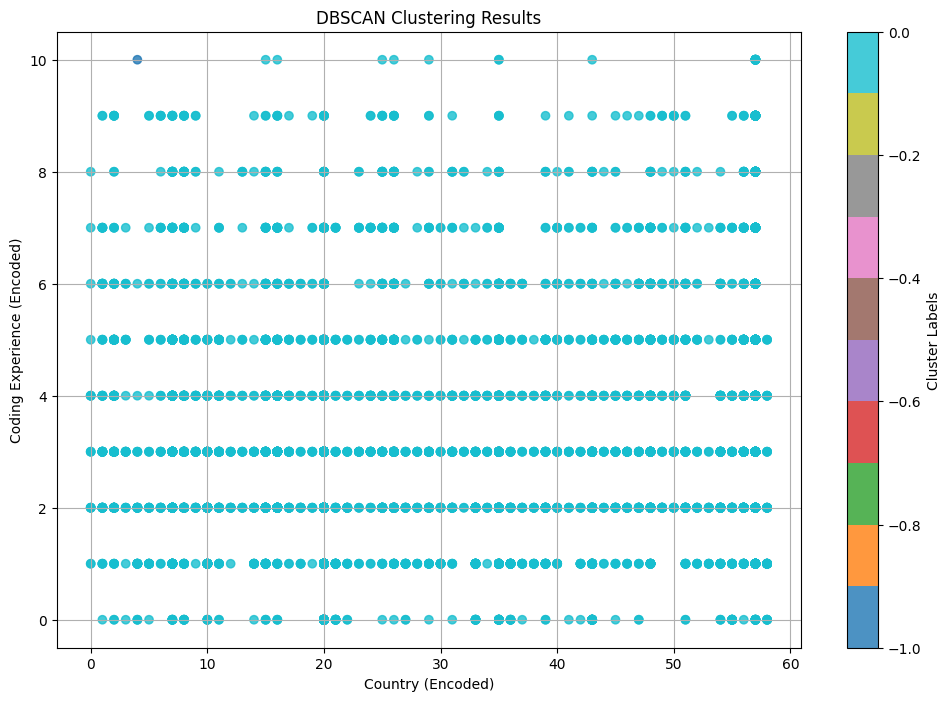

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' has the original columns and 'Cluster' column from DBSCAN
# Ensure 'Cluster' column is present in the dataframe
if 'Cluster' not in data.columns:
    raise ValueError("Cluster column not found. Make sure DBSCAN results are added to the data.")

# Plot the scatter plot with clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=data['Country'], 
    y=data['Coding_Experience'], 
    c=data['Cluster'],  # Use cluster as color
    cmap='tab10',       # Use a categorical colormap
    alpha=0.8           # Adjust transparency
)

# Adding color bar for cluster labels
plt.colorbar(scatter, label='Cluster Labels')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Country (Encoded)')
plt.ylabel('Coding Experience (Encoded)')
plt.grid(True)
plt.show()


In [44]:
from kmodes.kmodes import KModes

# Use K-Modes clustering
kmodes_model = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
labels = kmodes_model.fit_predict(data)

data['Cluster'] = labels

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 755, cost: 9287.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 256, cost: 9549.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 198, cost: 9782.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 247, cost: 10400.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1072, cost: 8792.0
Best run was number 5


C:\Users\Huawei\AppData\Local\Temp\ipykernel_11236\2829336155.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


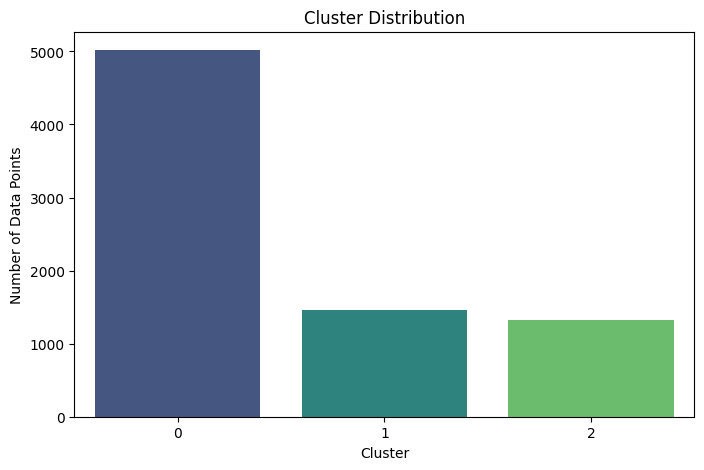

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of data points in each cluster
cluster_counts = data['Cluster'].value_counts()

# Plot cluster distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()


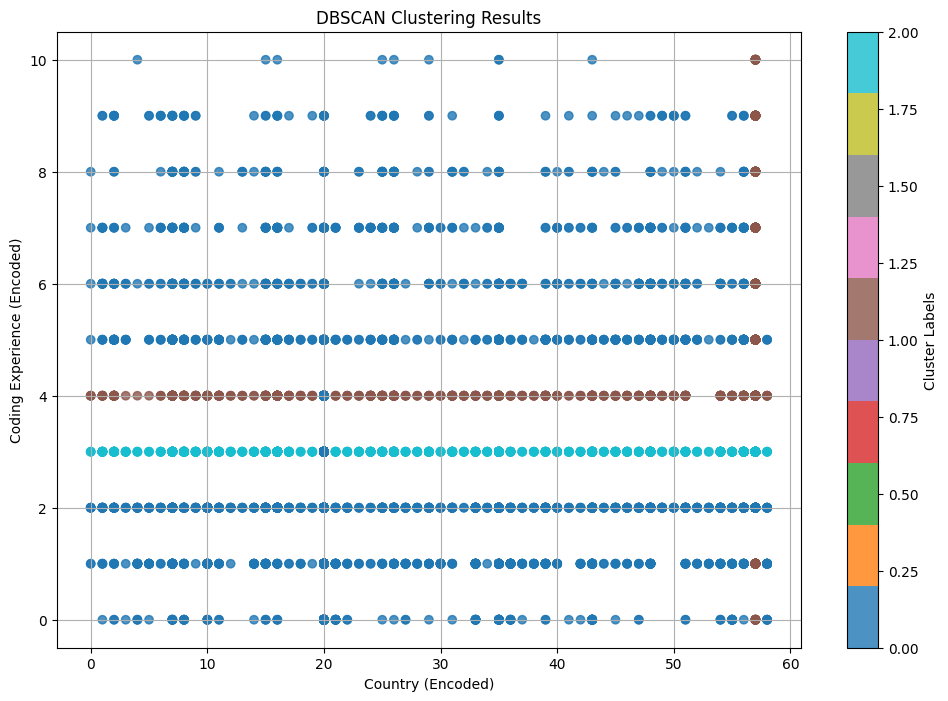

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' has the original columns and 'Cluster' column from DBSCAN
# Ensure 'Cluster' column is present in the dataframe
if 'Cluster' not in data.columns:
    raise ValueError("Cluster column not found. Make sure DBSCAN results are added to the data.")

# Plot the scatter plot with clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=data['Country'], 
    y=data['Coding_Experience'], 
    c=data['Cluster'],  # Use cluster as color
    cmap='tab10',       # Use a categorical colormap
    alpha=0.8           # Adjust transparency
)

# Adding color bar for cluster labels
plt.colorbar(scatter, label='Cluster Labels')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Country (Encoded)')
plt.ylabel('Coding Experience (Encoded)')
plt.grid(True)
plt.show()
